<a href="https://colab.research.google.com/github/cwnova/PythonNBA/blob/main/NBA_2023_Finals_efficiency_vs_trueshooting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Get data for 2022-23 playoffs. Effiency vs true shooting

Started with getting all data for 2023-playoffs but ended up limiting it to the two finals teams: Denver Nuggets and Miami Heat

In [ ]:
pip install nba_api

In [ ]:
from nba_api.stats import endpoints
postseason_gamelogs = endpoints.playergamelog.PlayerGameLog(season='2022-23',season_type_all_star='Playoffs', player_id ='203999').player_game_log.get_data_frame()

In [ ]:
from nba_api.stats import endpoints
postseason_leaders = endpoints.leagueleaders.LeagueLeaders(league_id ='00', per_mode48='PerGame', scope = 's', season='2022-23',season_type_all_star='Playoffs').league_leaders.get_data_frame()

In [ ]:
from nba_api.stats import endpoints
postseason_leadersTotals = endpoints.leagueleaders.LeagueLeaders(league_id ='00', per_mode48='Totals', scope = 's', season='2022-23',season_type_all_star='Playoffs').league_leaders.get_data_frame()

In [ ]:
##Calculate TS%

postseason_leadersTotals['TS%'] = (postseason_leadersTotals['PTS'] /
                                   (2 * (postseason_leadersTotals['FGA'] + 0.44 * postseason_leadersTotals['FTA']))) * 100

In [ ]:
import pandas as pd

# Perform the left join
merged_df = pd.merge(postseason_leaders, postseason_leadersTotals[['PLAYER_ID', 'TS%']], on='PLAYER_ID', how='left')

# Select all columns from dataframe1 and include the 'TS' column from dataframe2
result = merged_df

# Print the resulting dataframe
print(result)

     PLAYER_ID  RANK           PLAYER     TEAM_ID TEAM  GP   MIN   FGM   FGA  \
0      1626164     1     Devin Booker  1610612756  PHX  11  41.7  12.8  21.9   
1      1630162     2  Anthony Edwards  1610612750  MIN   5  39.8  11.0  22.8   
2       201939     3    Stephen Curry  1610612744  GSW  13  37.9  11.2  23.9   
3       203999     4     Nikola Jokic  1610612743  DEN  20  39.5  11.4  20.7   
4      1629027     5       Trae Young  1610612737  ATL   6  38.3  10.0  24.8   
..         ...   ...              ...         ...  ...  ..   ...   ...   ...   
139    1628975   140     Jevon Carter  1610612749  MIL   4  12.3   0.5   2.3   
140    1629723   141     John Konchar  1610612763  MEM   5   9.8   0.4   1.8   
141     201980   142      Danny Green  1610612739  CLE   4  10.0   0.3   1.3   
142    1630540   143    Miles McBride  1610612752  NYK   8   2.5   0.1   0.5   
143    1630556   144  Kessler Edwards  1610612758  SAC   6   1.2   0.0   0.0   

     FG_PCT  ...  OREB  DREB   REB   AS

In [ ]:
# Filter the resulting DataFrame by specific teams
filtered_result = result.loc[result['TEAM'].isin(['DEN', 'MIA'])]

# Print the filtered DataFrame
print(filtered_result)

In [ ]:
filtered_result

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF,TS%
3,203999,4,Nikola Jokic,1610612743,DEN,20,39.5,11.4,20.7,0.548,...,3.5,10.0,13.5,9.5,1.1,1.0,3.5,30.0,40.8,63.136628
9,202710,10,Jimmy Butler,1610612748,MIA,22,39.7,9.4,20.1,0.468,...,2.1,4.3,6.5,5.9,1.8,0.6,1.9,26.9,27.5,56.505803
10,1627750,11,Jamal Murray,1610612743,DEN,20,40.0,9.7,20.5,0.473,...,0.8,4.9,5.7,7.1,1.5,0.3,2.5,26.1,27.0,58.567454
33,1628389,34,Bam Adebayo,1610612748,MIA,23,37.0,7.3,15.1,0.481,...,2.7,7.1,9.9,3.7,0.8,0.7,2.7,17.9,21.7,52.983539
47,1629008,47,Michael Porter Jr.,1610612743,DEN,20,32.7,5.0,11.7,0.423,...,1.0,7.1,8.1,1.6,0.5,0.6,0.5,13.4,16.6,54.101151
50,203932,51,Aaron Gordon,1610612743,DEN,20,35.7,5.1,9.8,0.518,...,2.5,3.6,6.0,2.6,0.6,0.7,1.0,13.3,16.2,58.794817
51,1629216,52,Gabe Vincent,1610612748,MIA,22,30.5,4.5,11.2,0.402,...,0.4,1.0,1.4,3.5,0.9,0.2,1.4,12.7,10.4,53.456468
52,1628997,53,Caleb Martin,1610612748,MIA,23,30.2,4.7,9.0,0.529,...,1.2,4.3,5.4,1.6,0.9,0.4,1.0,12.7,15.4,65.718157
54,1628971,55,Bruce Brown,1610612743,DEN,20,26.6,4.5,8.8,0.511,...,0.8,3.3,4.0,1.9,1.1,0.5,1.2,12.0,13.6,60.741041
61,203484,62,Kentavious Caldwell-Pope,1610612743,DEN,20,33.6,3.7,8.1,0.457,...,0.7,2.6,3.3,1.6,1.3,0.7,0.8,10.6,11.9,59.751973


In [ ]:
postseason_leadersTotals

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,...,AST,STL,BLK,TOV,PF,PTS,EFF,AST_TOV,STL_TOV,TS%
0,203999,1,Nikola Jokic,1610612743,DEN,20,789,227,414,0.548,...,190,21,20,70,69,600,815,2.71,0.30,63.136628
1,202710,2,Jimmy Butler,1610612748,MIA,22,874,207,442,0.468,...,129,40,14,41,37,592,605,3.15,0.98,56.505803
2,1628369,3,Jayson Tatum,1610612738,BOS,20,799,185,404,0.458,...,105,21,21,56,44,543,608,1.88,0.38,58.477643
3,1627750,4,Jamal Murray,1610612743,DEN,20,799,194,410,0.473,...,142,30,5,50,41,522,540,2.84,0.60,58.567454
4,1627759,5,Jaylen Brown,1610612738,BOS,20,751,181,365,0.496,...,68,21,8,66,61,453,389,1.03,0.32,56.972532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,203648,194,Thanasis Antetokounmpo,1610612749,MIL,2,5,0,0,0.000,...,0,0,0,0,0,0,0,0.00,0.00,NaN
213,1628418,194,Thomas Bryant,1610612743,DEN,1,1,0,0,0.000,...,0,0,0,0,0,0,0,0.00,0.00,NaN
214,2617,194,Udonis Haslem,1610612748,MIA,2,3,0,3,0.000,...,0,0,0,0,0,0,-2,0.00,0.00,0.000000
215,1628427,194,Vlatko Cancar,1610612743,DEN,5,10,0,5,0.000,...,1,0,0,0,0,0,-1,0.00,0.00,0.000000


In [ ]:
import pandas as pd

# Set the option to display all columns
pd.set_option('display.max_columns', None)

# Print your DataFrame
postseason_leaders.head(20)

#postseason_leaders

,PLAYER_ID,RANK,PLAYER,TEAM_ID,TEAM,GP,MIN,FGM,FGA,FG_PCT,FG3M,FG3A,FG3_PCT,FTM,FTA,FT_PCT,OREB,DREB,REB,AST,STL,BLK,TOV,PTS,EFF
0,1626164,1,Devin Booker,1610612756,PHX,11,41.7,12.8,21.9,0.585,2.8,5.5,0.508,5.3,6.1,0.866,1.1,3.7,4.8,7.2,1.7,0.8,2.9,33.7,35.5
1,1630162,2,Anthony Edwards,1610612750,MIN,5,39.8,11.0,22.8,0.482,3.0,8.6,0.349,6.6,7.8,0.846,0.6,4.4,5.0,5.2,1.8,2.0,1.6,31.6,31.0
2,201939,3,Stephen Curry,1610612744,GSW,13,37.9,11.2,23.9,0.466,4.4,12.1,0.363,3.8,4.5,0.845,0.7,4.5,5.2,6.1,1.0,0.5,3.2,30.5,26.5
3,203999,4,Nikola Jokic,1610612743,DEN,20,39.5,11.4,20.7,0.548,1.8,3.8,0.461,5.6,7.0,0.799,3.5,10.0,13.5,9.5,1.1,1.0,3.5,30.0,40.8
4,1629027,5,Trae Young,1610612737,ATL,6,38.3,10.0,24.8,0.403,3.0,9.0,0.333,6.2,7.2,0.860,0.8,2.8,3.7,10.2,1.7,0.7,4.0,29.2,25.5
5,201142,6,Kevin Durant,1610612756,PHX,11,42.4,9.7,20.4,0.478,1.5,4.6,0.333,8.0,8.7,0.917,0.6,8.1,8.7,5.5,0.8,1.4,3.5,29.0,30.5
6,1628973,7,Jalen Brunson,1610612752,NYK,11,40.3,9.9,20.9,0.474,2.4,7.3,0.325,5.6,6.2,0.912,0.8,4.1,4.9,5.6,1.5,0.1,2.1,27.8,26.3
7,1628368,8,De'Aaron Fox,1610612758,SAC,7,38.6,10.0,23.6,0.424,3.0,9.0,0.333,4.4,5.9,0.756,1.7,3.7,5.4,7.7,2.1,0.6,4.0,27.4,24.3
8,1628369,9,Jayson Tatum,1610612738,BOS,20,40.0,9.3,20.2,0.458,2.7,8.2,0.323,6.0,6.9,0.876,1.3,9.2,10.5,5.3,1.1,1.1,2.8,27.2,30.4
9,202710,10,Jimmy Butler,1610612748,MIA,22,39.7,9.4,20.1,0.468,1.3,3.5,0.359,6.8,8.5,0.806,2.1,4.3,6.5,5.9,1.8,0.6,1.9,26.9,27.5


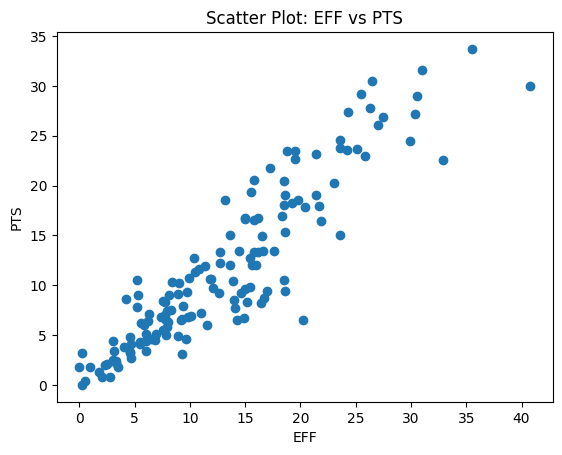

In [ ]:
import matplotlib.pyplot as plt

# Extract data from the DataFrame
x = postseason_leaders['EFF']  # X-axis values
y = postseason_leaders['PTS']  # Y-axis values

# Create scatter plot
plt.scatter(x, y)

# Add labels and title
plt.xlabel('EFF')
plt.ylabel('PTS')
plt.title('Scatter Plot: EFF vs PTS')

# Display the plot
plt.show()

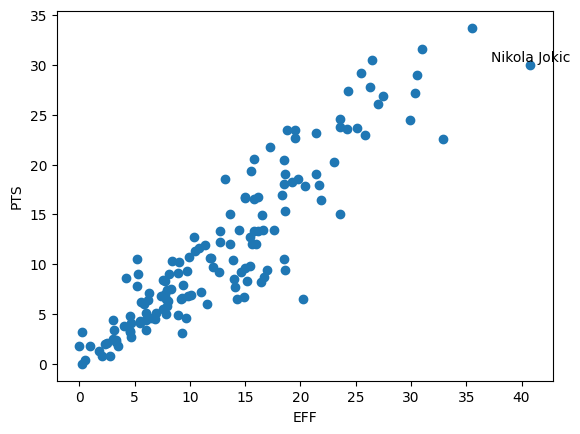

In [ ]:
import matplotlib.pyplot as plt

# Find the index of Nikola Jokic
jokic_index = postseason_leaders[postseason_leaders['PLAYER'] == 'Nikola Jokic'].index[0]

# Scatter plot
plt.scatter(postseason_leaders['EFF'], postseason_leaders['PTS'])

# Add label for Nikola Jokic
plt.text(postseason_leaders.loc[jokic_index, 'EFF'], postseason_leaders.loc[jokic_index, 'PTS'], 'Nikola Jokic', ha='center', va='bottom')

# Set X and Y axis labels
plt.xlabel('EFF')
plt.ylabel('PTS')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

import numpy as np

# Create an array of colors based on the 'TEAM' column
colors = np.where(filtered_result['TEAM'] == 'MIA', 'red', 'blue')

# Find the index of Nikola Jokic
jokic_index = filtered_result[filtered_result['PLAYER'] == 'Nikola Jokic'].index[0]



# Scatter plot
plt.scatter(filtered_result['TS%'], filtered_result['EFF'], c=colors)

# Add label for Nikola Jokic
plt.text(filtered_result.loc[jokic_index, 'TS%'], filtered_result.loc[jokic_index, 'EFF'], 'Nikola Jokic', ha='center', va='bottom')

# Set X and Y axis labels
plt.xlabel('TS')
plt.ylabel('EFF')

# Display the plot
plt.show()


In [ ]:
import matplotlib.pyplot as plt

# Scatter plot
plt.scatter(filtered_result['TS%'], filtered_result['EFF'], c=colors)

# Add labels for each player
for _, row in filtered_result.iterrows():
    player_name = row['PLAYER']
    plt.text(row['TS%'], row['EFF'], player_name, ha='center', va='bottom')

# Add label for Nikola Jokic
jokic_row = filtered_result[filtered_result['PLAYER'] == 'Nikola Jokic']
if not jokic_row.empty:
    jokic_index = jokic_row.index[0]
    plt.text(filtered_result.loc[jokic_index, 'TS%'], filtered_result.loc[jokic_index, 'EFF'], 'Nikola Jokic', ha='center', va='bottom')

# Set X and Y axis labels
plt.xlabel('TS%')
plt.ylabel('EFF')

# Display the plot
plt.show()




In [ ]:
!pip install adjustText

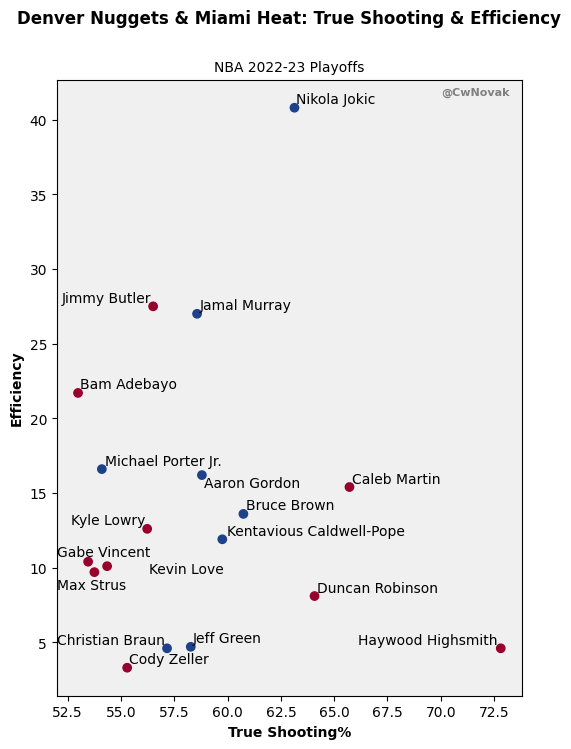

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import urllib
from adjustText import adjust_text
import urllib.request
from PIL import Image

# Create an array of colors based on the 'TEAM' column
colors = np.where(filtered_result['TEAM'] == 'MIA', '#98002E', '#1D428A')

# Set the background color  --light grey
background_color = '#f0f0f0'

# Create a figure with the specified background color
#fig = plt.figure(facecolor=background_color)

# Set the  figure size
##plt.figure(figsize=(8, 6))

plt.figure(figsize=(6, 8))

# Scatter plot
scatter = plt.scatter(filtered_result['TS%'], filtered_result['EFF'], c=colors)

# Create a list of labels
labels = [plt.text(filtered_result.loc[i, 'TS%'], filtered_result.loc[i, 'EFF'], filtered_result.loc[i, 'PLAYER'], ha='center', va='bottom') for i in filtered_result.index]

# Adjust the positions of labels to avoid overlap
adjust_text(labels)

# Set X and Y axis labels
plt.xlabel('True Shooting%',fontweight='bold')
plt.ylabel('Efficiency',fontweight='bold')
plt.title('NBA 2022-23 Playoffs', fontsize=10)
# Add a title above the main title
plt.text(0.5, 1.10, 'Denver Nuggets & Miami Heat: True Shooting & Efficiency', ha='center', va='center', transform=plt.gca().transAxes, fontsize=12, fontweight='bold', color='black')

## Add tag @cwnovak
plt.text(0.90, .98, '@CwNovak', ha='center', va='center', transform=plt.gca().transAxes, fontsize=8, fontweight='bold', color='grey')


# Set the background color
plt.gca().set_facecolor(background_color)

# Display the plot
plt.show()

# Save the plot as an image
plt.savefig('scatter_plot.png')
